In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from IPython.display import IFrame

IFrame('Boyce_12e_PPT_ch02_2.pdf', width=1000, height=700)

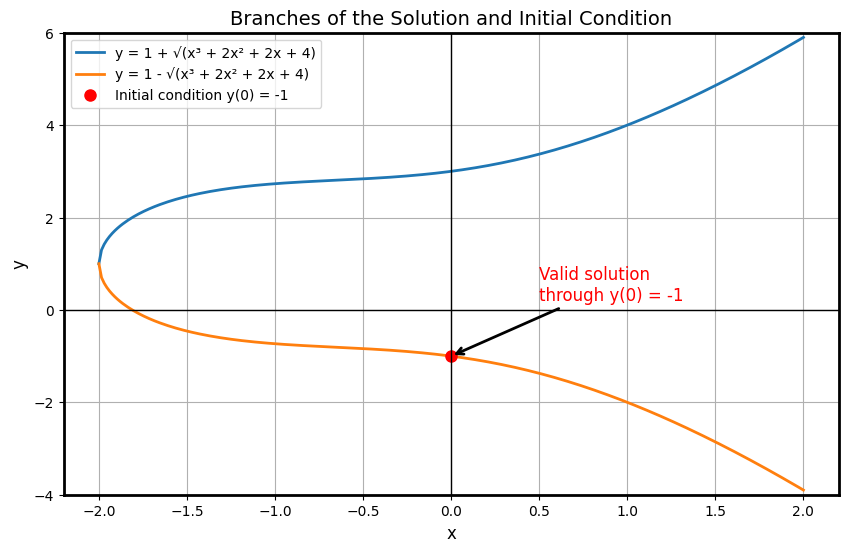

interactive(children=(FloatSlider(value=3.0, description='C', max=15.0, min=-10.0, step=0.5), Output()), _dom_…

interactive(children=(FloatSlider(value=3.0, description='C', max=15.0, min=-10.0, step=0.5), Output()), _dom_…

In [1]:
from demo import run_demo    
run_demo()
